In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import numpy as np
import datetime
from gensim.models import Word2Vec

In [4]:
movies=pd.read_csv("./gdrive/My Drive/python/Movie2vec/movies.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings=pd.read_csv("./gdrive//My Drive/python/Movie2vec/ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [7]:
ratings=ratings[ratings['rating']>=3.0]

ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
7,1,2134,4.5,1256677464


In [8]:
print(len(movies))
print(len(ratings))

58098
22759423


In [9]:
ratings_movie=pd.merge(ratings,movies,on='movieId')

r_dict=[]
grouped=ratings_movie.groupby(['userId'])
for idx, user in grouped:
  r_dict.append(user.sort_values(['timestamp'])['title'].values)

print(r_dict[1])

['Driving Miss Daisy (1989)' 'Escape from L.A. (1996)' 'L.A. Story (1991)'
 'Little Shop of Horrors (1986)' 'Manhattan (1979)'
 'Risky Business (1983)' 'Stripes (1981)' 'Big Chill, The (1983)'
 'Hackers (1995)' 'Harold and Maude (1971)' 'American Graffiti (1973)'
 'Arlington Road (1999)' 'Broadcast News (1987)'
 'Room with a View, A (1986)' 'Sex, Lies, and Videotape (1989)']


In [10]:
corpus=[]

for i in range(len(r_dict)):
  corpus.append([])
  for j in r_dict[i]:
    corpus[i].append(j)

print(corpus[1])
print(len(corpus))

['Driving Miss Daisy (1989)', 'Escape from L.A. (1996)', 'L.A. Story (1991)', 'Little Shop of Horrors (1986)', 'Manhattan (1979)', 'Risky Business (1983)', 'Stripes (1981)', 'Big Chill, The (1983)', 'Hackers (1995)', 'Harold and Maude (1971)', 'American Graffiti (1973)', 'Arlington Road (1999)', 'Broadcast News (1987)', 'Room with a View, A (1986)', 'Sex, Lies, and Videotape (1989)']
281583


In [11]:
start_time = datetime.datetime.now()

model=Word2Vec(corpus[:],size=100)
#model=Word2Vec(corpus[:],size=100,min_count=5)

end_time = datetime.datetime.now() # 종료시간
elapsed_time = end_time - start_time
print('걸린 시간:',elapsed_time)

걸린 시간: 0:02:26.500205


In [12]:
model_result1 = model.wv.most_similar("Toy Story (1995)",topn=15)
result1=pd.DataFrame(model_result1, columns=["title","consine similarity"])

result1[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,Babe (1995),0.542524
1,Seven (a.k.a. Se7en) (1995),0.516585
2,Aladdin (1992),0.512920
3,"Monsters, Inc. (2001)",0.489945
4,Finding Nemo (2003),0.489915
5,"Fugitive, The (1993)",0.487404
6,Apollo 13 (1995),0.484615
7,Saving Private Ryan (1998),0.482393
8,"Lion King, The (1994)",0.477474
9,"Sixth Sense, The (1999)",0.474133


In [13]:
model_result2 = model.wv.most_similar("Interstellar (2014)",topn=15)
result2=pd.DataFrame(model_result2, columns=["title","consine similarity"])

result2[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,The Imitation Game (2014),0.807525
1,Whiplash (2014),0.794289
2,Ex Machina (2015),0.789304
3,The Martian (2015),0.765107
4,Mad Max: Fury Road (2015),0.752472
5,Inside Out (2015),0.739384
6,Intouchables (2011),0.731718
7,Edge of Tomorrow (2014),0.729665
8,Gone Girl (2014),0.725286
9,Guardians of the Galaxy (2014),0.723256


In [14]:
model_result3 = model.wv.most_similar("Modern Times (1936)",topn=15)
result3=pd.DataFrame(model_result3, columns=["title","consine similarity"])

result3[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,"Gold Rush, The (1925)",0.813270
1,City Lights (1931),0.807983
2,"Great Dictator, The (1940)",0.747580
3,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,0.739231
4,"General, The (1926)",0.720131
5,"Kid, The (1921)",0.681531
6,M (1931),0.619199
7,Rashomon (Rashômon) (1950),0.616535
8,His Girl Friday (1940),0.586390
9,Yojimbo (1961),0.582478


In [0]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

#path_gothic = "/home/ururu/fonts/NanumGothic.ttf"
#prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [16]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [17]:
df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])
df.head()

,x,y
Three Colors: Blue (Trois couleurs: Bleu) (1993),52.933220,6.661117
¡Three Amigos! (1986),39.638630,41.941509
"Running Man, The (1987)",37.306824,27.251852
Falling Down (1993),42.605976,21.998100
Waiting for Guffman (1996),52.229599,13.959299


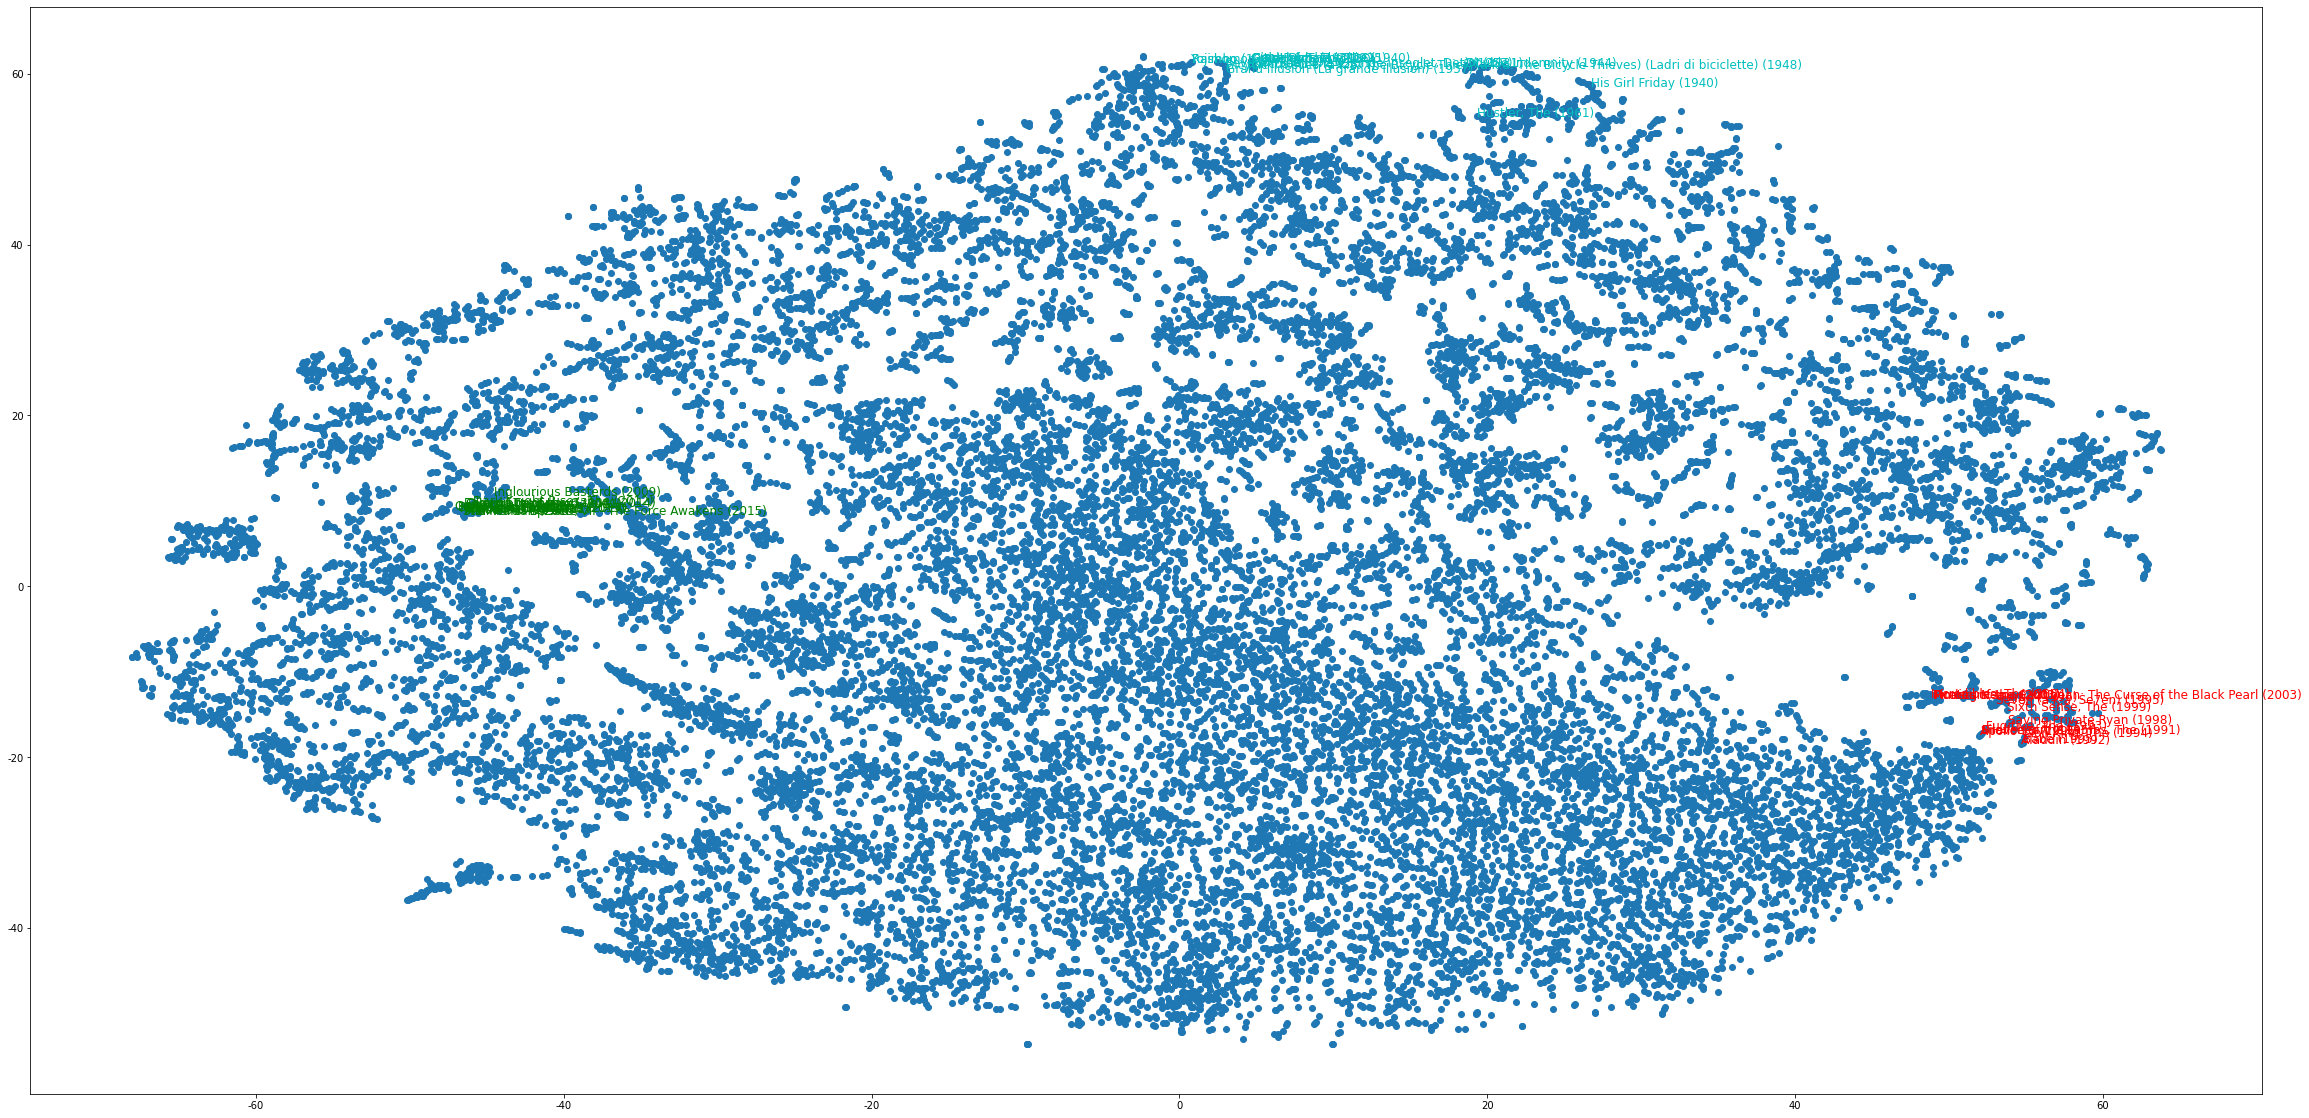

In [18]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"],df["y"])

for word, pos in list(df.iterrows()):
    for a, b in model_result1:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="r")
    
    for a, b in model_result2:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="g")
    
    for a, b in model_result3:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="c")
    
plt.show()